In [2]:
import midiprocessor as midip
from importlib import reload 
reload(midip)

midip.convertMidiFile('midicontent/let-it-be.mid','midicontent/let-it-beY.npy')

Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
note_on
Note
n

In [14]:
from mido import MidiFile

mid = MidiFile('content/hey-jude.mid')

In [16]:
from mido import tempo2bpm
import numpy as np
time=0
currentTempo=500000
tickPerBeat=mid.ticks_per_beat
notes=np.zeros((102),np.int32)
# An array to store notes from 0 to 60 s 
Y=np.zeros((102,300*10),np.int32)
print(Y.shape)

lastIndexTime=0

for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    totalticks=0
    for msg in track:
        note=-1
        if not msg.is_meta:
            if msg.type=='note_on':
                totalticks=totalticks+msg.time
                # La note est ajoutée que si la batterie (canal 9 n'est pas concerné)
                if msg.channel!=9:
                    if msg.velocity==0:
                        note=msg.note
                        notes[note]=0
                    else:
                        note=msg.note
                        notes[note]=1
        elif msg.type=='time_signature':
            print(msg)
        elif msg.type=='set_tempo':
            currentTempo=msg.tempo
            #print(totalticks,msg)
        time=time+msg.time*currentTempo/tickPerBeat
        #print(time)
        indextime=int(time*10//1000000)
        #print(indextime)
        #print("saut",indextime-lastIndexTime)
        if note>-1:
            Y[note,indextime]=1
        if (indextime-lastIndexTime)>1:
            #print("saut de",lastIndexTime,"à",indextime)
            for i in range(lastIndexTime+1,indextime):
                #print("copie de", i-1,"vers",i)
                Y[:,i]=Y[:,i-1]
            
        lastIndexTime=indextime
            
print("Temps total",time/1000000/60//1,time/1000000/60%1*60)

np.save('content/hey-judeY.npy',Y)

(102, 3000)
Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
Temps total 4.0 35.675740000000644


In [71]:
from scipy.io import wavfile # get the api
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
from scipy.signal.windows import tukey
import os
import scipy.signal as signal
from math import log2
from math import pow
import re

fs,y = wavfile.read('content/let-it-be-70.wav') # load the data
# In stereo case we only consider first channel
if len(y.shape)>1:
    y=y.T[0]
y=y/np.max(y)*2
# how many seconds of audio make up an FFT window
windowsize=int(fs*.1)
#win = tukey(windowsize)  
win=np.ones(windowsize)
SFT = ShortTimeFFT(win, hop=fs//10, fs=fs,  scale_to='psd')
spectro=SFT.spectrogram(y)

/tmp/ipykernel_117/2023159526.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,y = wavfile.read('content/let-it-be-70.wav') # load the data


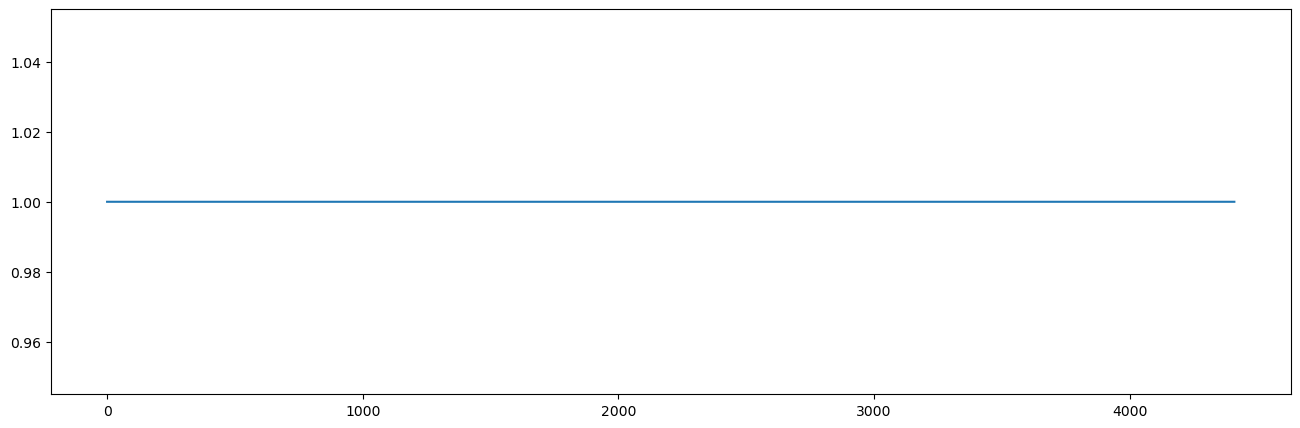

In [72]:
en=spectro.sum(axis=0)
np.min(np.where(en>0))

#plt.plot(en)
#plt.xlim(20,40)
plt.plot(win)

1.0


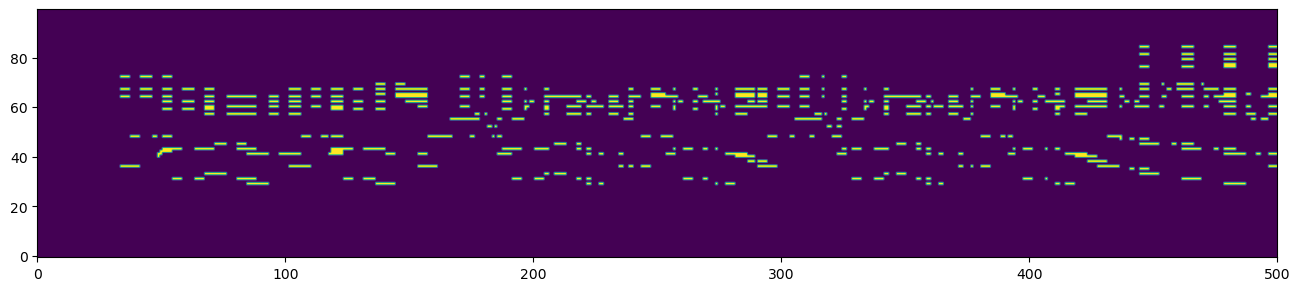

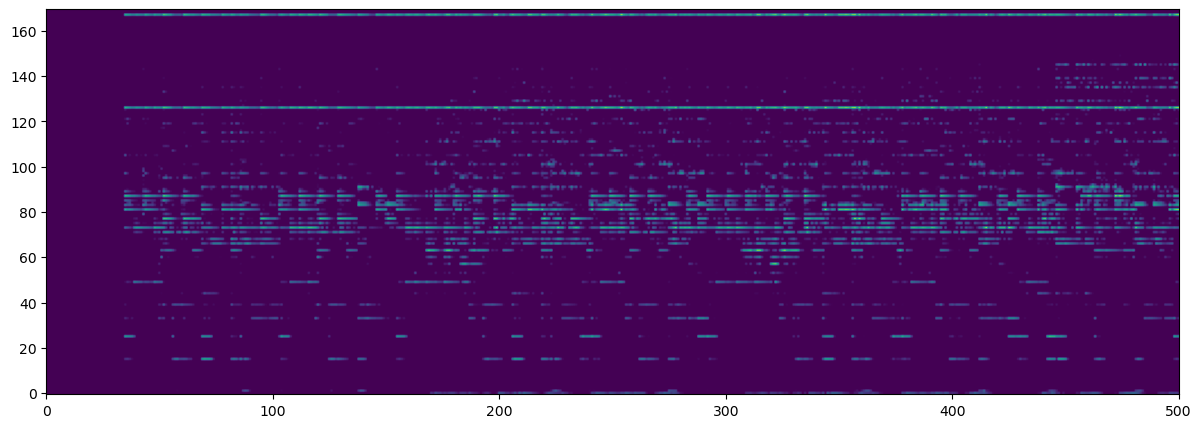

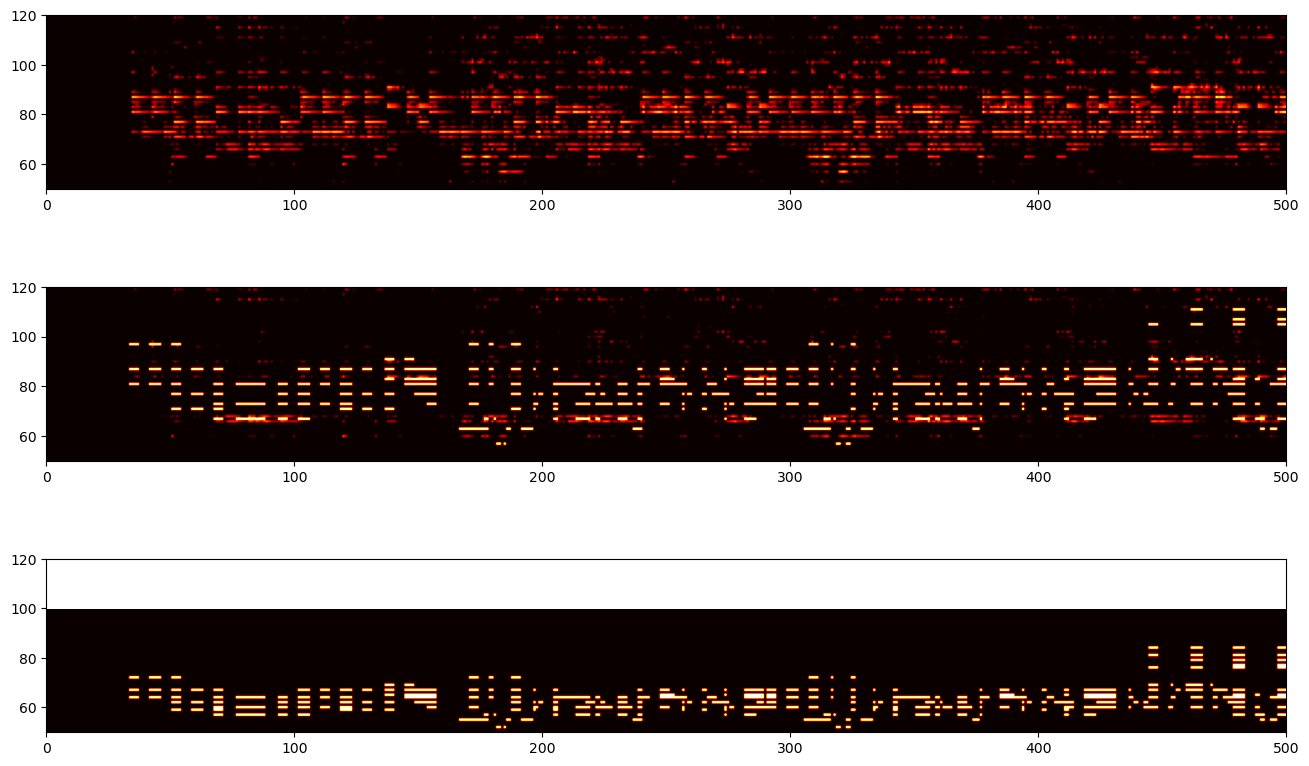

Xstart 35
Ystart 34


In [45]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X=np.load("content/let-it-be-70.npy")
X=X-np.min(X)
X=X/np.max(X)
print(np.max(X))
plt.rcParams['figure.figsize'] = [16, 5]
plt.imshow(Y, origin='lower')
plt.xlim(0,500)
plt.show()
plt.imshow(X, origin='lower')
plt.xlim(0,500)
plt.show()
XYsuperpose=X.copy()
for i in range(80):
    hauteur=((i-24)*2)+1
    if(hauteur>0):
       ## print("coucou")
       #XYsupperpose[hauteur,:500]= np.maximum(X[hauteur,:500],Y[i,:500])
       XYsuperpose[hauteur,:1000]= np.maximum(0,Y[i,:1000])

#XYsupperpose=X
plt.rcParams['figure.figsize'] = [16, 10]

plt.subplot(3, 1, 1)
plt.imshow(X, origin='lower',cmap='hot')
plt.xlim(0,500)
plt.ylim(50,120)
plt.subplot(3, 1, 2)
plt.imshow(XYsuperpose, origin='lower',cmap='hot')
plt.xlim(0,500)
plt.ylim(50,120)
plt.subplot(3, 1, 3)
plt.imshow(Y, origin='lower',cmap='hot')
plt.xlim(0,500)
plt.ylim(50,120)
plt.show()

print("Xstart",np.min(np.where(X.sum(axis=0)>0)))
print("Ystart",np.min(np.where(Y.sum(axis=0)>0)))
